# Warm-up excercise 5: In class coding

Now that you have seen how to conduct basic analyses and to visualise data, it's time for you to combine apply this knowledge. To prepare for the workshop, we ask you to complete two warm-up excercises.


Some important notes for the excercises:

* These excercises are a warming up meant to help you get ready for the meeting. Make sure to give them a try on all of them. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next excercise.
* As these excercises are meant to help you participate in the workshop and us to make sure you can get as much as possible from the meetings, we do not expect perfect answers. However, this is important to show the effort you have put in the excercises and what obstacles you faced.

For this excercice, we will use the dataset about customers of a company that you also worked with in an earlier warm-up exercise. There are two short excercises for you to practice data exploration and visualization.

Let's start by importing the necessary packages and loading the data. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

# Excercise 1

0. The dataset is too large to fit your screen. Make sure you get an idea of the dataset using `.shape`, `.head()`, and `.columns`
1. Explore the demographics of the customer base by answering the follolwing questions:
    - What is the minimum, maximum and average age of the customers in the dataset? <br /> *Tip: you need to create a new column based on `Year_Birth`. <br /> You can actually do sth very simple like `2023-df['Year_Birth']`. You can use the resulting series directly, or assign it to a new column. (Remember? `df['new'] = ...`)
    - What are the relative and absolute frequencies of education levels of customers in the dataset? <br /> *Tip: the same method of pandas allows you to compute relative and absolute frequencies for a column.*
2. You want to know what type of customers file complains. Get an initial idea of the relationship between 1) education level, 2) age, and if someone has complained.
3. Is there a correlation between one's income and number of purchases they make online and in store?

In [7]:
df.shape

(2240, 28)

In [8]:
df.head()

,customer_id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,4,7,0,0,0,0,0,0,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,2,5,0,0,0,0,0,0,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,10,4,0,0,0,0,0,0,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,4,6,0,0,0,0,0,0,3,11
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,6,5,0,0,0,0,0,0,3,11


In [9]:
df.columns

Index(['customer_id', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')

In [4]:
df["Age"] = 2024-df["Year_Birth"] 

In [12]:
df.head()

,customer_id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,67
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,70
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,59
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,40
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,43


In [5]:
df["Age"].describe().apply(lambda x: round(x, 3)) # add the lambda part for fewer decimals

count    2240.000
mean       55.194
std        11.984
min        28.000
25%        47.000
50%        54.000
75%        65.000
max       131.000
Name: Age, dtype: float64

In [6]:
# absolute frequencies

df["Education"].value_counts(ascending=True)

Education
Basic           54
2n Cycle       202
Master         370
PhD            486
Graduation    1126
Name: count, dtype: int64

In [19]:
df["Education"].value_counts(normalize=True, ascending=True)

Education
Basic         0.024129
2n Cycle      0.090259
Master        0.165326
PhD           0.217158
Graduation    0.503128
Name: proportion, dtype: float64

In [17]:
pd.crosstab(df["Education"], df["Complain"], normalize='index')

Complain,0,1
Education,,
2n Cycle,0.980198,0.019802
Basic,1.000000,0.000000
Graduation,0.987567,0.012433
Master,0.994595,0.005405
PhD,0.997942,0.002058


In [14]:
pd.crosstab(df["Age"], df["Complain"])

Complain,0,1
Age,,
28,2,0
29,4,1
30,3,0
31,5,0
32,13,0
33,15,0
34,18,0
35,30,0
36,28,1


In [10]:
df.groupby("Complain")["Age"].mean()

Complain
0    55.159081
1    58.904762
Name: Age, dtype: float64

In [11]:
print(
    df["Income"].corr(
        df["NumWebPurchases"], method="pearson"
    )
)

0.3878778112917908


In [13]:
print(df["Income"].corr(df["NumWebPurchases"], method="spearman"))

0.5732615958009307


# Excercise 2

Visualize different variables in your dataset. Make sure to consider what the appropriate visualization is for each variable.
1. Visualize age distribution of the customers.
2. Visualize education levels of the customers.
3. Visualize the relation between
    * education level and if someone has complained,
    * age and if someone has complained. 
4. Visualize the relation between one's income and number of purchases they have made online and in store. 

<Axes: ylabel='Frequency'>

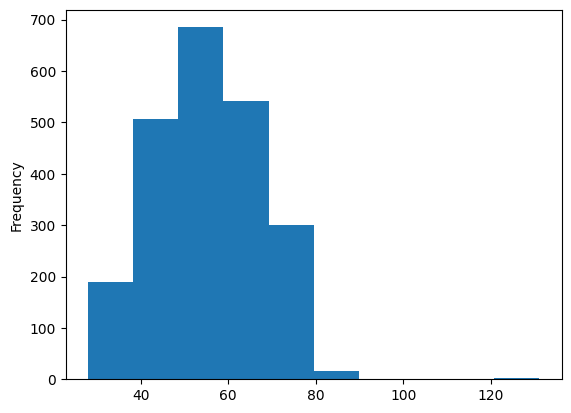

In [18]:
df["Age"].plot.hist()

<Axes: xlabel='Age', ylabel='Count'>

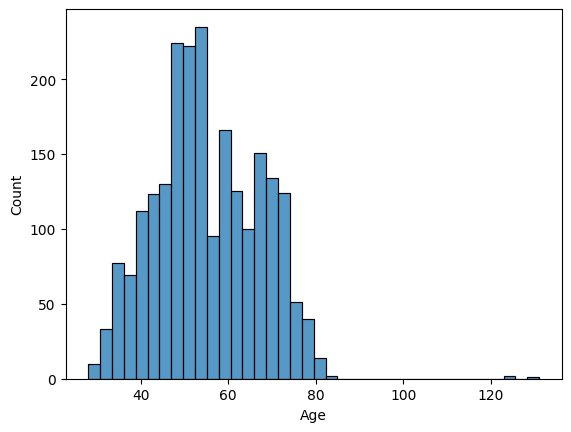

In [21]:
sns.histplot(data=df, x="Age")

<Axes: xlabel='Education', ylabel='Complain'>

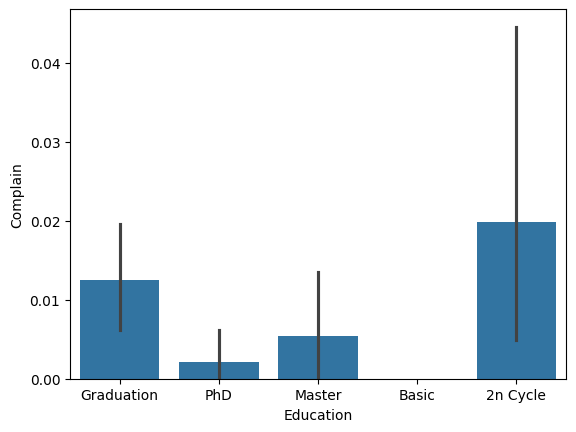

In [25]:
sns.barplot(x="Education", y="Complain", data=df, errorbar=('ci', 95))

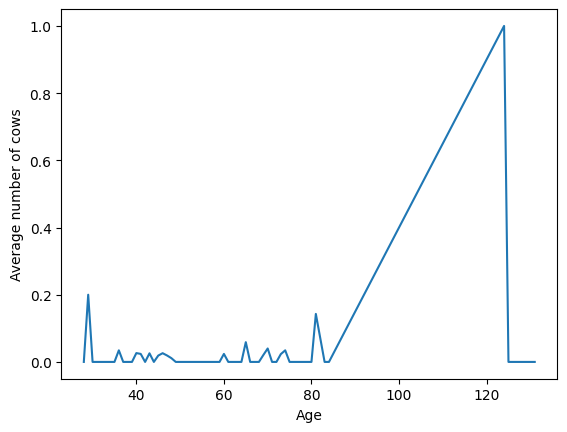

In [26]:
# Plot relationship between age and complains

complaints_age = df.groupby(["Age"])["Complain"].mean()
complaints_age = complaints_age.to_frame()

plt.plot(complaints_age.index, complaints_age["Complain"])
plt.xlabel("Age")
plt.ylabel("Average number of cows")
plt.show()

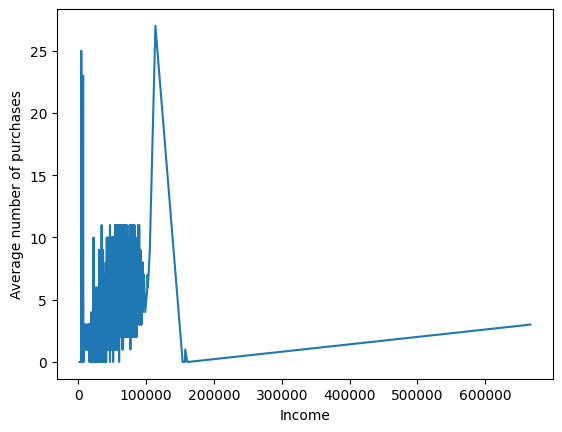

In [29]:
income_purchases = df.groupby(["Income"])["NumWebPurchases"].mean()
income_purchases = income_purchases.to_frame()

plt.plot(income_purchases.index, income_purchases["NumWebPurchases"])
plt.xlabel("Income")
plt.ylabel("Average number of purchases")
plt.show()

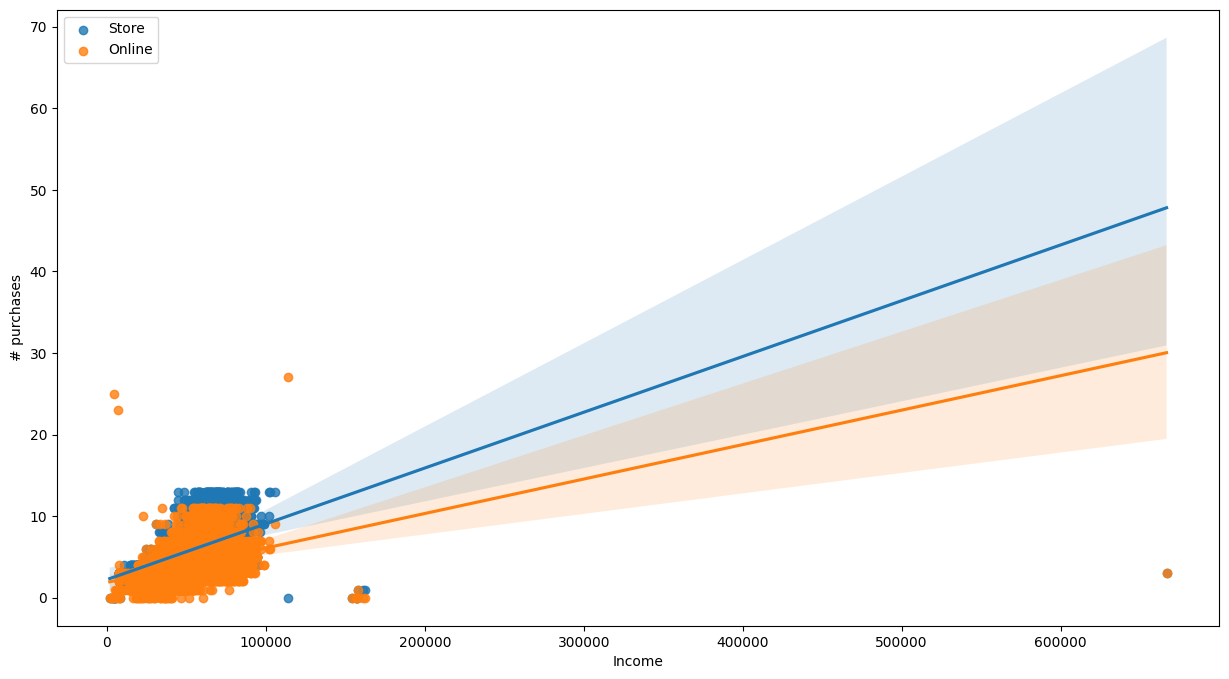

In [30]:
# 

plt.figure(figsize = (15,8))
ax = sns.regplot(x='Income', y='NumStorePurchases', data=df, label='Store')
ax = sns.regplot(x='Income', y='NumWebPurchases', data=df, label='Online')
ax.set_ylabel("# purchases")
ax.set_xlabel("Income")
ax.legend()